In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/Summary


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', 'Random'))
sys.path.append(os.path.join('..', 'SA'))
sys.path.append(os.path.join('..', 'QA'))
sys.path.append(os.path.join('..', '4ti2', 'functions'))

In [4]:
import QA_DwaveSampler_AutoEmbedding as qda
import random_exact_test_functions as ret
import SA_exact_test_functions as net
import zsolve_t1 as zt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math

In [5]:
method_list_all = ['enumeration', 'random', 'SA', 'QA']
method_list_35 = ['random', 'SA', 'QA']
method_list_40 = ['SA', 'QA']

bit_list_30 = [20, 25, 30]
bit_list_35 = [20, 25, 30, 35]
bit_list_all = [20, 25, 30, 35, 40]
bit_list_40 = [20, 25, 30, 35, 40]

In [170]:
num_list = [0, 1, 2, 3, 4]

## num_summaryの結果

In [6]:
mean_time_30 = {'enumeration': np.array([1.3675000e+00, 7.2605000e+02, 3.3409995e+04]),
 'random': np.array([0.16132569, 0.08967829, 0.09759275]),
 'SA': np.array([ 6.71171999, 10.47453302, 15.60987657]),
 'QA': np.array([4.99072197, 4.28289333, 4.47897885])}

In [7]:
std_time_30 = {'enumeration': np.array([2.00892229e+00, 1.25184699e+03, 5.02576943e+04]),
 'random': np.array([0.06280883, 0.01582359, 0.03228892]),
 'SA': np.array([1.44925711, 2.38598211, 0.40440301]),
 'QA': np.array([0.18774028, 0.27979906, 0.21954586])}

In [8]:
mean_time_35 = {'random': np.array([0.16576357, 0.08967829, 0.09759275, 0.1303755 ]),
 'SA': np.array([ 6.52093158, 10.62495122, 15.6712944 , 19.13201284]),
 'QA': np.array([4.98170116, 4.25146448, 4.57997291, 5.22034847])}

In [9]:
std_time_35 = {'random': np.array([0.05687476, 0.01582359, 0.03228892, 0.02569759]),
 'SA': np.array([1.35125046, 2.15518701, 0.38199742, 0.92346264]),
 'QA': np.array([0.16888644, 0.25803314, 0.2817082 , 0.73373871])}

In [10]:
mean_time_40 = {'SA': np.array([ 6.52093158, 10.62495122, 15.6712944 , 19.13201284, 21.92081871]),
 'QA': np.array([4.98170116, 4.25146448, 4.57997291, 5.22034847, 6.31009797])}

In [171]:
for i in num_list:
    print(mean_time_40['SA'][i]/mean_time_40['QA'][i])

1.3089768676529765
2.499127364225327
3.4217002388339455
3.6648919032793996
3.473926841424302


In [11]:
std_time_40 = {'SA': np.array([1.35125046, 2.15518701, 0.38199742, 0.92346264, 0.48748451]),
 'QA': np.array([0.16888644, 0.25803314, 0.2817082 , 0.73373871, 0.21800283])}

In [12]:
mean_per_time_30 = {'enumeration': np.array([1.51893346e-04, 8.27971470e-03, 5.24014779e-01]),
 'random': np.array([0.00734041, 0.01334127, 0.04185725]),
 'SA': np.array([0.00289929, 0.00246898, 0.00172703]),
 'QA': np.array([0.01752374, 0.18807463, 0.50661569])}

In [13]:
std_per_time_30 = {'enumeration': np.array([9.89925726e-05, 1.38292151e-02, 8.86145530e-01]),
 'random': np.array([0.00590476, 0.00906725, 0.0235083 ]),
 'SA': np.array([0.00107751, 0.00167222, 0.00011063]),
 'QA': np.array([0.00520329, 0.15610689, 0.31925769])}

In [14]:
mean_per_time_35 = {'random': np.array([0.02422384, 0.01334127, 0.04185725, 0.02423282]),
 'SA': np.array([0.00674849, 0.00226224, 0.00170527, 0.00198538]),
 'QA': np.array([0.03506417, 0.16064674, 0.41744852, 1.35795246])}

In [15]:
std_per_time_35 = {'random': np.array([0.03417738, 0.00906725, 0.0235083 , 0.00193666]),
 'SA': np.array([7.75849517e-03, 1.55178373e-03, 1.08096716e-04, 6.85109890e-05]),
 'QA': np.array([0.03538823, 0.15001549, 0.33666528, 1.65014699])}

In [16]:
mean_per_time_40 = {'SA': np.array([0.00674849, 0.00226224, 0.00170527, 0.00198538, 0.00227319]),
 'QA': np.array([0.03506417, 0.16064674, 0.41744852, 1.35795246, 4.18134653])}

In [17]:
std_per_time_40 = {'SA': np.array([7.75849517e-03, 1.55178373e-03, 1.08096716e-04, 6.85109890e-05,
        4.58730874e-05]),
 'QA': np.array([0.03538823, 0.15001549, 0.33666528, 1.65014699, 2.41282658])}

In [18]:
mean_valid_y_num_30 = {'enumeration': np.array([  5466.  ,  29617.  , 168138.75]),
 'random': np.array([53.25      , 12.33333333,  3.        ]),
 'SA': np.array([3148. , 6081. , 9065.5]),
 'QA': np.array([216.25,  62.5 ,  26.75])}

In [19]:
std_valid_y_num_30 = {'enumeration': np.array([  6360.94627394,  35111.91836115, 153648.69596807]),
 'random': np.array([62.10223426,  9.87702159,  1.41421356]),
 'SA': np.array([2393.95018745, 2898.20332275,  463.75235848]),
 'QA': np.array([40.99618885, 66.06247044, 32.62188682])}

In [20]:
mean_valid_y_num_35 = {'random': np.array([43.        , 12.33333333,  3.        ,  5.5       ]),
 'SA': np.array([2570.4, 6429.2, 9219.6, 9632.4]),
 'QA': np.array([181.2,  66.2,  37.8,  21.4])}

In [21]:
std_valid_y_num_35 = {'random': np.array([59.20810755,  9.87702159,  1.41421356,  1.5       ]),
 'SA': np.array([2432.95808431, 2684.14585297,  516.75936373,  163.64180395]),
 'QA': np.array([79.11106117, 59.54964316, 36.60273214, 25.4133823 ])}

In [22]:
mean_valid_y_num_40 = {'SA': np.array([2570.4, 6429.2, 9219.6, 9632.4, 9643. ]),
 'QA': np.array([181.2,  66.2,  37.8,  21.4,   3. ])}

In [23]:
std_valid_y_num_40 = {'SA': np.array([2432.95808431, 2684.14585297,  516.75936373,  163.64180395,
          66.92383731]),
 'QA': np.array([79.11106117, 59.54964316, 36.60273214, 25.4133823 ,  2.91547595])}

In [24]:
mean_p_30 = {'enumeration': np.array([0.26059747, 0.11365836, 0.16867348]),
 'random': np.array([0.23886218, 0.13782051, 0.        ]),
 'SA': np.array([0.25966267, 0.11276122, 0.16679454]),
 'QA': np.array([0.24236129, 0.1100974 , 0.11506024])}

In [25]:
std_p_30 = {'enumeration': np.array([0.04557463, 0.04237354, 0.10233717]),
 'random': np.array([0.10069648, 0.16844466, 0.        ]),
 'SA': np.array([0.04585217, 0.04339645, 0.10187008]),
 'QA': np.array([0.10069574, 0.02413985, 0.16633816])}

In [26]:
mean_p_35 = {'random': np.array([0.29108974, 0.13782051, 0.        , 0.125     ]),
 'SA': np.array([0.29080706, 0.14075871, 0.14722172, 0.07099383]),
 'QA': np.array([0.27193781, 0.1004236 , 0.12375551, 0.0289441 ])}

In [27]:
std_p_35 = {'random': np.array([0.1379228 , 0.16844466, 0.        , 0.125     ]),
 'SA': np.array([0.07457767, 0.06813251, 0.0991685 , 0.04579337]),
 'QA': np.array([0.10775336, 0.02899164, 0.14979031, 0.05104608])}

In [28]:
mean_p_40 = {'SA': np.array([0.29080706, 0.14075871, 0.14722172, 0.07099383, 0.04547416]),
 'QA': np.array([0.27193781, 0.1004236 , 0.12375551, 0.0289441 , 0.03125   ])}

In [29]:
std_p_40 = {'SA': np.array([0.07457767, 0.06813251, 0.0991685 , 0.04579337, 0.01616154]),
 'QA': np.array([0.10775336, 0.02899164, 0.14979031, 0.05104608, 0.05412659])}

In [30]:
mean_total_y_num_35 = {'random': np.array([43.2       , 12.33333333,  3.        ,  5.5       ]),
 'SA': np.array([9745. , 9494.4, 9616.6, 9645.4]),
 'QA': np.array([253.2,  67.6,  38. ,  21.4])}

In [31]:
std_total_y_num_35 = {'random': np.array([59.60335561,  9.87702159,  1.41421356,  1.5       ]),
 'SA': np.array([103.5992278 , 499.0216829 , 303.14920419, 156.94279213]),
 'QA': np.array([120.00566653,  61.23593716,  36.85105155,  25.4133823 ])}

In [32]:
mean_total_y_num_40 = {'SA': np.array([9745. , 9494.4, 9616.6, 9645.4, 9645. ]),
 'QA': np.array([253.2,  67.6,  38. ,  21.4,   3. ])}

In [33]:
std_total_y_num_40 = {'SA': np.array([103.5992278 , 499.0216829 , 303.14920419, 156.94279213,
         67.37061674]),
 'QA': np.array([120.00566653,  61.23593716,  36.85105155,  25.4133823 ,
          2.91547595])}

In [34]:
mean_occurrence_35 = {'random': np.array([1.00125, 1.     , 1.     , 1.     ]),
 'SA': np.array([11,  2,  1,  1]),
 'QA': np.array([1, 1, 1, 1])}

In [35]:
std_occurrence_35 = {'random': np.array([0.0025, 0.    , 0.    , 0.    ]),
 'SA': np.array([13.1605471,  2.       ,  0.       ,  0.       ]),
 'QA': np.array([0., 0., 0., 0.])}

In [36]:
mean_occurrence_40 = {'SA': np.array([11,  2,  1,  1,  1]), 'QA': np.array([1, 1, 1, 1, 1])}

In [37]:
std_occurrence_40 = {'SA': np.array([13.1605471,  2.       ,  0.       ,  0.       ,  0.       ]),
 'QA': np.array([0., 0., 0., 0., 0.])}

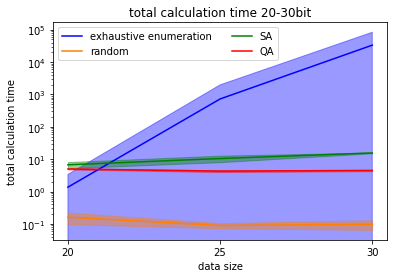

In [129]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_time_30['random'] + std_time_30['random'], mean_time_30['random'] - std_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('total calculation time 20-30bit')
plt.savefig('_30bit_total_calculation_time_mean_std_log.png')
plt.show()

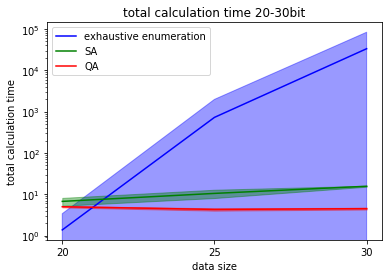

In [130]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_30, mean_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_30, mean_time_30['random'] + std_time_30['random'], mean_time_30['random'] - std_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_time_30['SA'] + std_time_30['SA'], mean_time_30['SA'] - std_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_time_30['QA'] + std_time_30['QA'], mean_time_30['QA'] - std_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left')
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('total calculation time 20-30bit')
plt.savefig('norandom_30bit_total_calculation_time_mean_std_log.png')
plt.show()

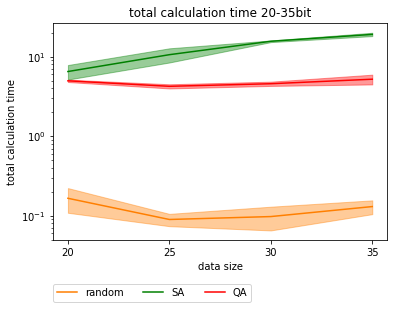

In [158]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_time_35['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_time_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_time_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_time_35['enumeration'] + std_time_35['enumeration'], mean_time_35['enumeration'] - std_time_35['enumeration'], alpha=0.4)
ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_time_35['SA'] + std_time_35['SA'], mean_time_35['SA'] - std_time_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_time_35['QA'] + std_time_35['QA'], mean_time_35['QA'] - std_time_35['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='upper left', ncol=3)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_35)
ax.set_yscale('log')
plt.title('total calculation time 20-35bit')
plt.savefig('_35bit_total_calculation_time_mean_std_log.png')
plt.show()

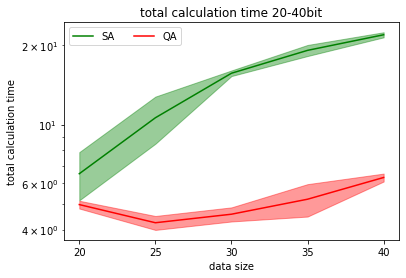

In [135]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_time_35['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_time_35['enumeration'] + std_time_35['enumeration'], mean_time_35['enumeration'] - std_time_35['enumeration'], alpha=0.4)
#ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('_40bit_total_calculation_time_mean_std_log.png')
plt.show()

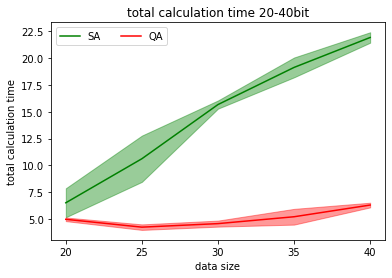

In [169]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_time_35['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_time_35['enumeration'] + std_time_35['enumeration'], mean_time_35['enumeration'] - std_time_35['enumeration'], alpha=0.4)
#ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('_40bit_total_calculation_time_mean_std.png')
plt.show()

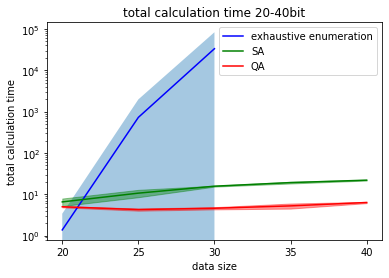

In [167]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4)
#ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right', ncol=1)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('norandom_30bit_40bit_total_calculation_time_mean_std_log.png')
plt.show()

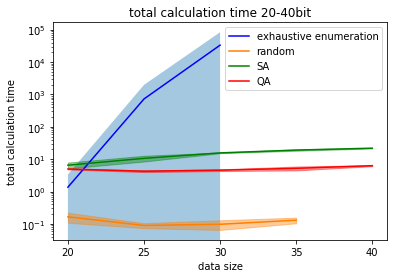

In [168]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_time_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_time_30['enumeration'] + std_time_30['enumeration'], mean_time_30['enumeration'] - std_time_30['enumeration'], alpha=0.4)
ax.fill_between(bit_list_35, mean_time_35['random'] + std_time_35['random'], mean_time_35['random'] - std_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_time_40['SA'] + std_time_40['SA'], mean_time_40['SA'] - std_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_time_40['QA'] + std_time_40['QA'], mean_time_40['QA'] - std_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right', ncol=1)
ax.set_xlabel('data size')
ax.set_ylabel('total calculation time')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('total calculation time 20-40bit')
plt.savefig('30bit_40bit_total_calculation_time_mean_std_log.png')
plt.show()

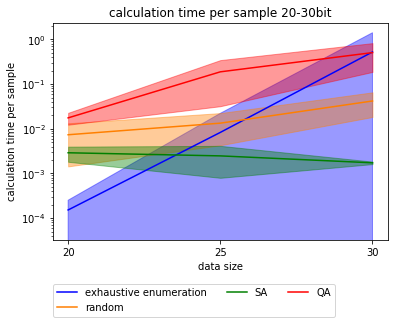

In [136]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_per_time_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_per_time_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_per_time_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_per_time_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_per_time_30['enumeration'] + std_per_time_30['enumeration'], mean_per_time_30['enumeration'] - std_per_time_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_per_time_30['random'] + std_per_time_30['random'], mean_per_time_30['random'] - std_per_time_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_per_time_30['SA'] + std_per_time_30['SA'], mean_per_time_30['SA'] - std_per_time_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_per_time_30['QA'] + std_per_time_30['QA'], mean_per_time_30['QA'] - std_per_time_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('calculation time per sample 20-30bit')
plt.savefig('_30bit_per_time_mean_std_log.png')
plt.show()

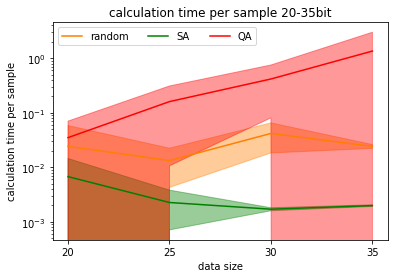

In [159]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_per_time_35['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_per_time_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_per_time_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_per_time_35['enumeration'] + std_per_time_35['enumeration'], mean_per_time_35['enumeration'] - std_per_time_35['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_per_time_35['SA'] + std_per_time_35['SA'], mean_per_time_35['SA'] - std_per_time_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_per_time_35['QA'] + std_per_time_35['QA'], mean_per_time_35['QA'] - std_per_time_35['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=3)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_35)
ax.set_yscale('log')
plt.title('calculation time per sample 20-35bit')
plt.savefig('_35bit_per_time_mean_std_log.png')
plt.show()

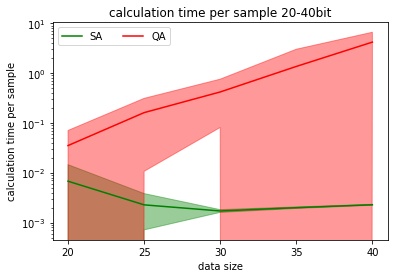

In [138]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_per_time_35['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_35, mean_per_time_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_per_time_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_per_time_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_per_time_35['enumeration'] + std_per_time_35['enumeration'], mean_per_time_35['enumeration'] - std_per_time_35['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_35, mean_per_time_35['random'] + std_per_time_35['random'], mean_per_time_35['random'] - std_per_time_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_per_time_40['SA'] + std_per_time_40['SA'], mean_per_time_40['SA'] - std_per_time_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_per_time_40['QA'] + std_per_time_40['QA'], mean_per_time_40['QA'] - std_per_time_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('calculation time per sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('calculation time per sample 20-40bit')
plt.savefig('_40bit_per_time_mean_std_log.png')
plt.show()

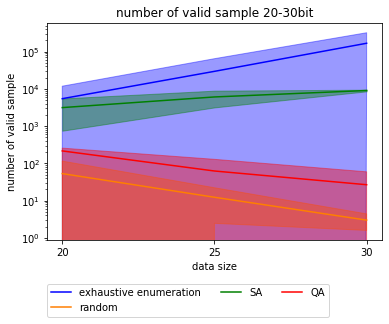

In [139]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_valid_y_num_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_valid_y_num_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_valid_y_num_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_valid_y_num_30['random'] + std_valid_y_num_30['random'], mean_valid_y_num_30['random'] - std_valid_y_num_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_valid_y_num_30['SA'] + std_valid_y_num_30['SA'], mean_valid_y_num_30['SA'] - std_valid_y_num_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_valid_y_num_30['QA'] + std_valid_y_num_30['QA'], mean_valid_y_num_30['QA'] - std_valid_y_num_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper left', ncol=3)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_30)
ax.set_yscale('log')
plt.title('number of valid sample 20-30bit')
plt.savefig('_30bit_valid_y_num_mean_std_log.png')
plt.show()

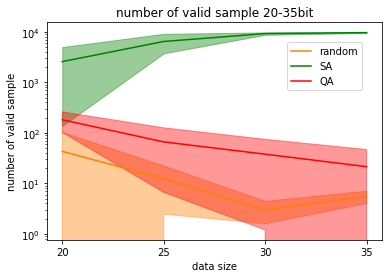

In [140]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_valid_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_valid_y_num_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_valid_y_num_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_35, mean_valid_y_num_35['random'] + std_valid_y_num_35['random'], mean_valid_y_num_35['random'] - std_valid_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_valid_y_num_35['SA'] + std_valid_y_num_35['SA'], mean_valid_y_num_35['SA'] - std_valid_y_num_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_valid_y_num_35['QA'] + std_valid_y_num_35['QA'], mean_valid_y_num_35['QA'] - std_valid_y_num_35['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
#ax.legend(loc='upper right', ncol=2)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=2, fontsize=10)
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=2, fontsize=10)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_35)
ax.set_yscale('log')
plt.title('number of valid sample 20-35bit')
plt.savefig('_35bit_valid_y_num_mean_std_log.png')
plt.show()

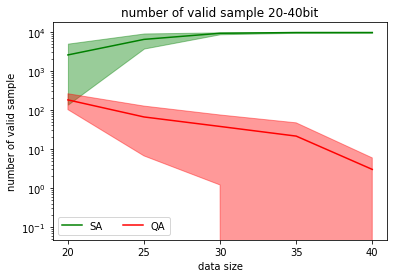

In [141]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_30, mean_valid_y_num_30['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_35, mean_valid_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_valid_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_valid_y_num_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_valid_y_num_30['enumeration'] + std_valid_y_num_30['enumeration'], mean_valid_y_num_30['enumeration'] - std_valid_y_num_30['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_35, mean_valid_y_num_35['random'] + std_valid_y_num_35['random'], mean_valid_y_num_35['random'] - std_valid_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_valid_y_num_40['SA'] + std_valid_y_num_40['SA'], mean_valid_y_num_40['SA'] - std_valid_y_num_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_valid_y_num_40['QA'] + std_valid_y_num_40['QA'], mean_valid_y_num_40['QA'] - std_valid_y_num_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('number of valid sample')

ax.set_xticks(bit_list_40)
ax.set_yscale('log')
plt.title('number of valid sample 20-40bit')
plt.savefig('_40bit_valid_y_num_mean_std_log.png')
plt.show()

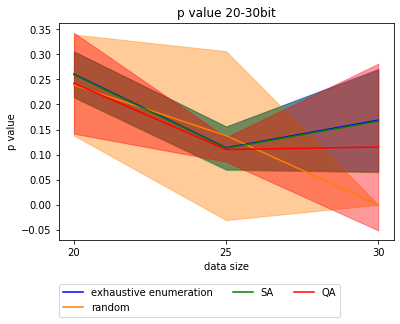

In [142]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_30['enumeration'] - std_p_30['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_30, mean_p_30['random'] + std_p_30['random'], mean_p_30['random'] - std_p_30['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_30, mean_p_30['SA'] + std_p_30['SA'], mean_p_30['SA'] - std_p_30['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_30, mean_p_30['QA'] + std_p_30['QA'], mean_p_30['QA'] - std_p_30['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10, ncol = 3)
#ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('_30bit_p_mean_std.png')
plt.show()

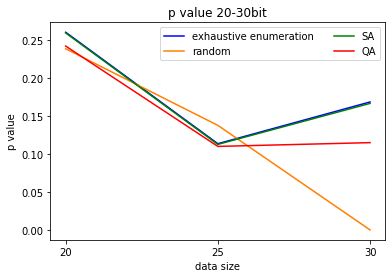

In [161]:
## ここから

fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_30, mean_p_30['random'], label='random', color='#ff7f00')
ax.plot(bit_list_30, mean_p_30['SA'], label='SA', color='g')
ax.plot(bit_list_30, mean_p_30['QA'], label='QA', color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right', ncol=2)
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_30)
#ax.set_yscale('log')
plt.title('p value 20-30bit')
plt.savefig('_30bit_p_mean.png')
plt.show()

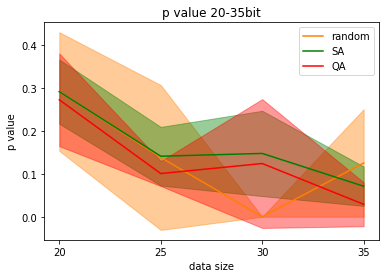

In [145]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_p_35['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_p_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_p_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_p_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_p_35['enumeration'] + std_p_35['enumeration'], mean_p_35['enumeration'] - std_p_35['enumeration'], alpha=0.4, color='b')
ax.fill_between(bit_list_35, mean_p_35['random'] + std_p_35['random'], mean_p_35['random'] - std_p_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_p_35['SA'] + std_p_35['SA'], mean_p_35['SA'] - std_p_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_p_35['QA'] + std_p_35['QA'], mean_p_35['QA'] - std_p_35['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('p value 20-35bit')
plt.savefig('_35bit_p_mean_std.png')
plt.show()

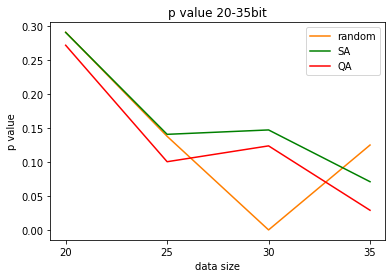

In [146]:
## ここから

fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_p_35['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_p_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_p_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_p_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_p_35['enumeration'] + std_p_35['enumeration'], mean_p_35['enumeration'] - std_p_35['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_35, mean_p_35['random'] + std_p_35['random'], mean_p_35['random'] - std_p_35['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_35, mean_p_35['SA'] + std_p_35['SA'], mean_p_35['SA'] - std_p_35['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_35, mean_p_35['QA'] + std_p_35['QA'], mean_p_35['QA'] - std_p_35['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('p value 20-35bit')
plt.savefig('_35bit_p_mean.png')
plt.show()

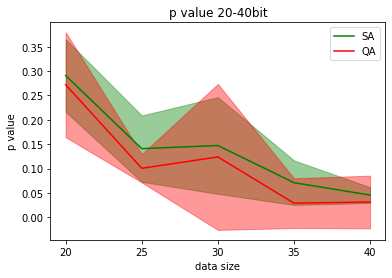

In [150]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_40, mean_p_40['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_40, mean_p_40['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_p_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_p_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_40, mean_p_40['enumeration'] + std_p_40['enumeration'], mean_p_40['enumeration'] - std_p_40['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_40, mean_p_40['random'] + std_p_40['random'], mean_p_40['random'] - std_p_40['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_40, mean_p_40['SA'] + std_p_40['SA'], mean_p_40['SA'] - std_p_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_p_40['QA'] + std_p_40['QA'], mean_p_40['QA'] - std_p_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('p value 20-40bit')
plt.savefig('_40bit_p_mean_std.png')
plt.show()

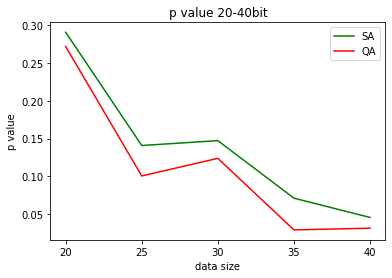

In [149]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_40, mean_p_40['enumeration'], label='exhaustive enumeration', color='b')
#ax.plot(bit_list_40, mean_p_40['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_p_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_p_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_40, mean_p_40['enumeration'] + std_p_40['enumeration'], mean_p_40['enumeration'] - std_p_40['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_40, mean_p_40['random'] + std_p_40['random'], mean_p_40['random'] - std_p_40['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_p_40['SA'] + std_p_40['SA'], mean_p_40['SA'] - std_p_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_p_40['QA'] + std_p_40['QA'], mean_p_40['QA'] - std_p_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('p value 20-40bit')
plt.savefig('_40bit_p_mean.png')
plt.show()

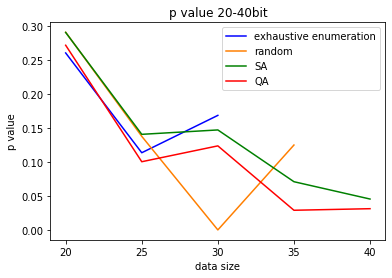

In [162]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_30, mean_p_30['enumeration'], label='exhaustive enumeration', color='b')
ax.plot(bit_list_35, mean_p_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_40, mean_p_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_p_40['QA'], label='QA', color='r')

#ax.fill_between(bit_list_30, mean_p_30['enumeration'] + std_p_30['enumeration'], mean_p_40['enumeration'] - std_p_40['enumeration'], alpha=0.4, color='b')
#ax.fill_between(bit_list_40, mean_p_40['random'] + std_p_40['random'], mean_p_40['random'] - std_p_40['random'], alpha=0.4, color='#ff7f00')
#ax.fill_between(bit_list_40, mean_p_40['SA'] + std_p_40['SA'], mean_p_40['SA'] - std_p_40['SA'], alpha=0.4, color='g')
#ax.fill_between(bit_list_40, mean_p_40['QA'] + std_p_40['QA'], mean_p_40['QA'] - std_p_40['QA'], alpha=0.4, color='r')

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('p value')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('p value 20-40bit')
plt.savefig('_30bit_40bit_p_mean.png')
plt.show()

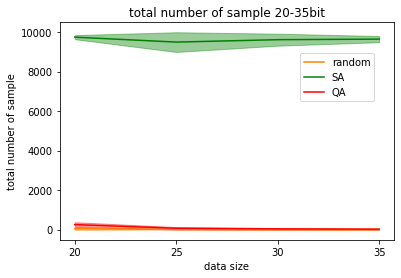

In [151]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_total_y_num_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_total_y_num_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_total_y_num_35['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_total_y_num_35['random'] + std_total_y_num_35['random'], mean_total_y_num_35['random'] - std_total_y_num_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_total_y_num_35['SA'] + std_total_y_num_35['SA'], mean_total_y_num_35['SA'] - std_total_y_num_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_total_y_num_35['QA'] + std_total_y_num_35['QA'], mean_total_y_num_35['QA'] - std_total_y_num_35['QA'], alpha=0.4, color='r')

#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(1, 0.95), loc='upper right', borderaxespad=2, fontsize=10)
ax.set_xlabel('data size')
ax.set_ylabel('total number of sample')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('total number of sample 20-35bit')
plt.savefig('_35bit_total_y_num_mean_std.png')
plt.show()

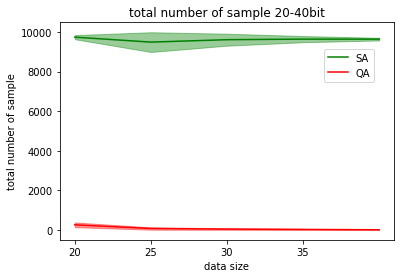

In [153]:
fig, ax = plt.subplots(1)
ax.plot(bit_list_40, mean_total_y_num_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_total_y_num_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_40, mean_total_y_num_40['SA'] + std_total_y_num_40['SA'], mean_total_y_num_40['SA'] - std_total_y_num_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_total_y_num_40['QA'] + std_total_y_num_40['QA'], mean_total_y_num_40['QA'] - std_total_y_num_40['QA'], alpha=0.4, color='r')

plt.legend(bbox_to_anchor=(1, 0.97), loc='upper right', borderaxespad=2, fontsize=10)
#plt.legend(bbox_to_anchor=(0, 0.2), loc='upper left', borderaxespad=0.5, fontsize=10, ncol = 2)
ax.set_xlabel('data size')
ax.set_ylabel('total number of sample')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('total number of sample 20-40bit')
plt.savefig('_40bit_total_y_num_mean_std.png')
plt.show()

In [ ]:
mean_occurrence_35

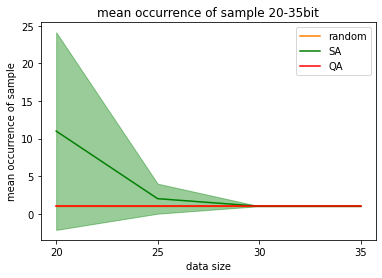

In [154]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_35, mean_occurrence_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_occurrence_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_occurrence_35['QA'], label='QA', color='r')

ax.fill_between(bit_list_35, mean_occurrence_35['random'] + std_occurrence_35['random'], mean_occurrence_35['random'] - std_occurrence_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_occurrence_35['SA'] + std_occurrence_35['SA'], mean_occurrence_35['SA'] - std_occurrence_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_occurrence_35['QA'] + std_occurrence_35['QA'], mean_occurrence_35['QA'] - std_occurrence_35['QA'], alpha=0.4, color='r')

ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('mean occurrence of sample')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('mean occurrence of sample 20-35bit')
plt.savefig('_35bit_mean_occurrence_mean_std.png')
plt.show()

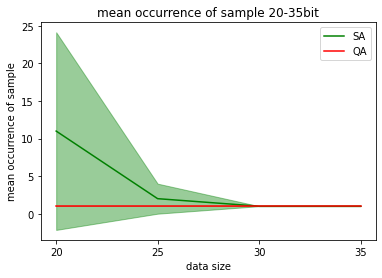

In [155]:
fig, ax = plt.subplots(1)

#ax.plot(bit_list_35, mean_occurrence_35['random'], label='random', color='#ff7f00')
ax.plot(bit_list_35, mean_occurrence_35['SA'], label='SA', color='g')
ax.plot(bit_list_35, mean_occurrence_35['QA'], label='QA', color='r')

#ax.fill_between(bit_list_35, mean_occurrence_35['random'] + std_occurrence_35['random'], mean_occurrence_35['random'] - std_occurrence_35['random'], alpha=0.4, color='#ff7f00')
ax.fill_between(bit_list_35, mean_occurrence_35['SA'] + std_occurrence_35['SA'], mean_occurrence_35['SA'] - std_occurrence_35['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_35, mean_occurrence_35['QA'] + std_occurrence_35['QA'], mean_occurrence_35['QA'] - std_occurrence_35['QA'], alpha=0.4, color='r')

ax.legend(loc='upper right')
ax.set_xlabel('data size')
ax.set_ylabel('mean occurrence of sample')

ax.set_xticks(bit_list_35)
#ax.set_yscale('log')
plt.title('mean occurrence of sample 20-35bit')
plt.savefig('norandom_35bit_mean_occurrence_mean_std.png')
plt.show()

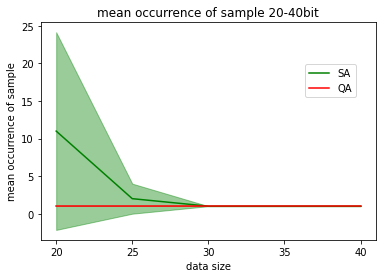

In [156]:
fig, ax = plt.subplots(1)

ax.plot(bit_list_40, mean_occurrence_40['SA'], label='SA', color='g')
ax.plot(bit_list_40, mean_occurrence_40['QA'], label='QA', color='r')

ax.fill_between(bit_list_40, mean_occurrence_40['SA'] + std_occurrence_40['SA'], mean_occurrence_40['SA'] - std_occurrence_40['SA'], alpha=0.4, color='g')
ax.fill_between(bit_list_40, mean_occurrence_40['QA'] + std_occurrence_40['QA'], mean_occurrence_40['QA'] - std_occurrence_40['QA'], alpha=0.4, color='r')

#ax.legend(loc='upper left', ncol=2)
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper right', borderaxespad=2, fontsize=10)
ax.set_xlabel('data size')
ax.set_ylabel('mean occurrence of sample')

ax.set_xticks(bit_list_40)
#ax.set_yscale('log')
plt.title('mean occurrence of sample 20-40bit')
plt.savefig('40bit_mean_occurrence_mean_std.png')
plt.show()